<a href="https://colab.research.google.com/github/Young4424/ML_DL_practice/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_Ch3_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch3 회귀 알고리즘과 모델 규제

## 3-1 k-최근접 이웃 회귀

---

회귀 : 지도 학습 알고리즘의 하나로 임의로 어떤 숫자를 예측하는 문제, 정해진 클래스가 없고 임의의 수치를 출력한다.


정확환 표현으로는 두 변수 사이의 상관관계를 분석하는 방법을 회귀라고 부르기도 한다.

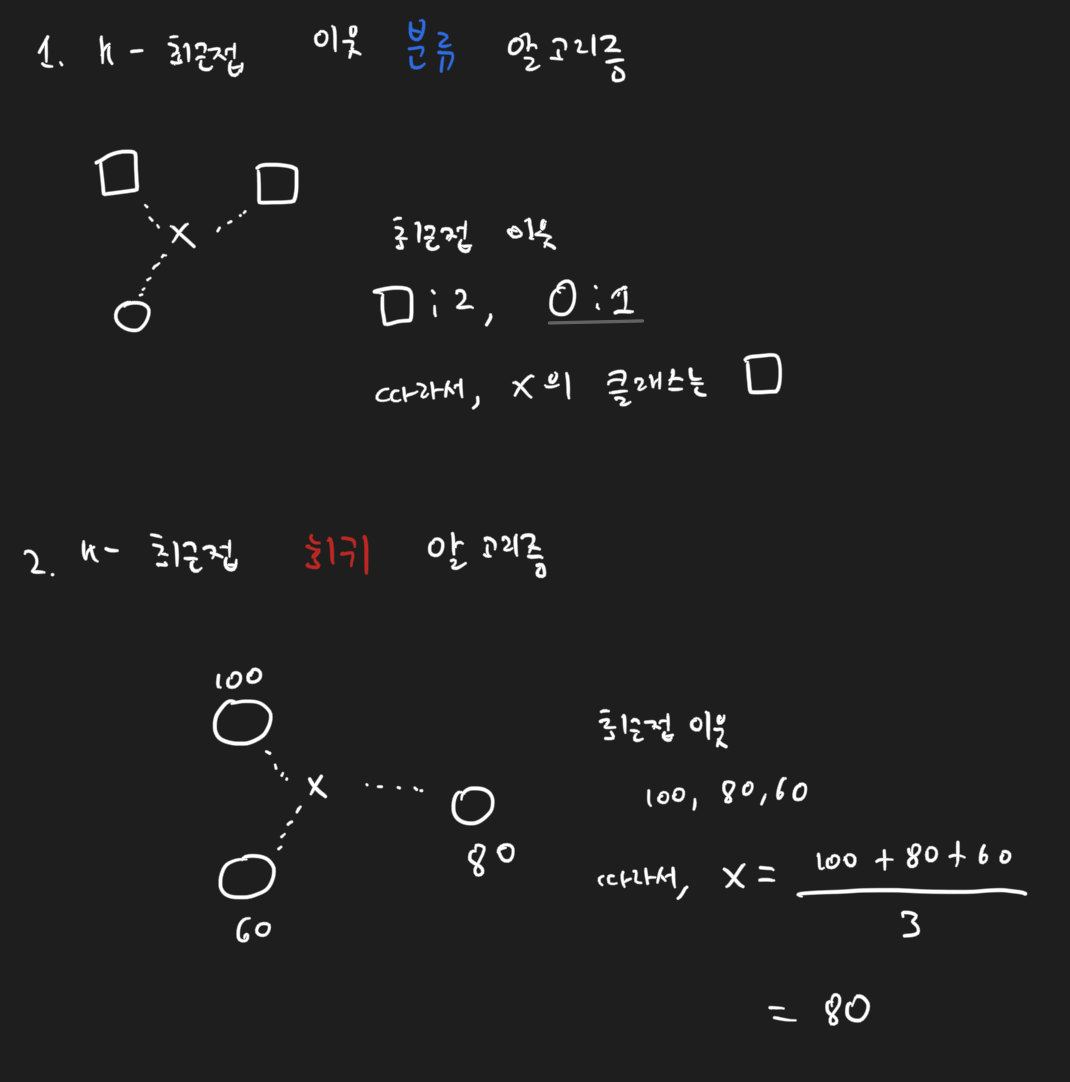

### 데이터 준비

In [119]:
 # 농어의 길이만으로도 무게를 예측할 수 있다고 가정
 # 특성 = 무게, 타겟 = 무게

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


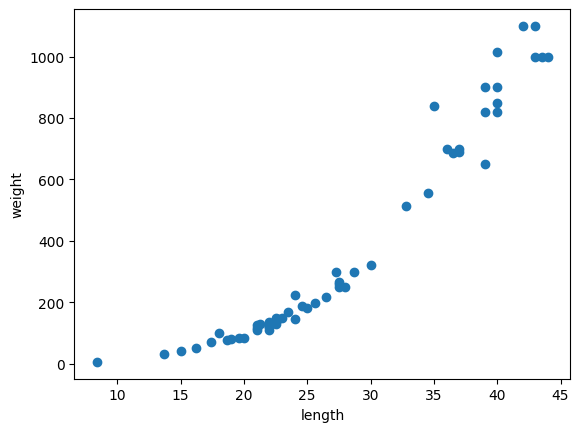

In [120]:
# 산점도를 통한 데이터의 형태 파악

import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [121]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [122]:
"""
사이킷런에 사용할 훈련 세트는 2차원 배열이어야 하지만, perch_length가 1차원 배열이기 때문에,
이를 나눈 train_input과 test_input도 1차원 배열이다.

이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꿔야 한다.


[1,2,3] = [[1],
           [2],
           [3]]

크기 : (3,) 1차원 배열로 길이가 3인 벡터를 나타냄,
크기 : (3,1) 2차원 배열로 3행 1열의 행렬로 나타냄

"""

'\n사이킷런에 사용할 훈련 세트는 2차원 배열이어야 하지만, perch_length가 1차원 배열이기 때문에,\n이를 나눈 train_input과 test_input도 1차원 배열이다.\n\n이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꿔야 한다.\n\n\n[1,2,3] = [[1],\n           [2],\n           [3]]\n\n크기 : (3,) 1차원 배열로 길이가 3인 벡터를 나타냄,\n크기 : (3,1) 2차원 배열로 3행 1열의 행렬로 나타냄\n\n'

배열(array)과 행렬(matrix)의 주요 차이점은 다음과 같습니다:

**정의와 구조**

1. **배열(Array)**:
   - 일반적으로 컴퓨터 프로그래밍에서 사용되는 개념입니다.
   - 여러 종류의 데이터를 포함할 수 있는 다차원 데이터 구조입니다.
   - 1차원, 2차원, 3차원 등 다양한 차원으로 구성될 수 있습니다.

2. **행렬(Matrix)**:
   - 수학적 개념으로, 주로 숫자나 변수를 직사각형 배열로 나타낸 것입니다.
   - 2차원 구조로, 행(row)과 열(column)로 구성됩니다.
   - 주로 수치 계산을 위해 사용됩니다.

**용도와 특징**

1. **배열(Array)**:
   - 프로그래밍에서 다양한 데이터 타입을 저장하고 관리하는 데 사용됩니다.
   - NumPy에서는 다차원 배열을 지원하며, 이를 통해 복잡한 데이터 구조를 표현할 수 있습니다.

2. **행렬(Matrix)**:
   - 선형대수학에서 중요한 역할을 하며, 경제수학 등 다양한 분야에서 사용됩니다.
   - 행렬 곱셈, 전치, 역행렬 등 특수한 수학적 연산이 정의되어 있습니다.
   - NumPy에서는 matrix 자료형을 제공하여 행렬 연산을 더 쉽게 할 수 있도록 합니다.

**연산의 차이**

1. **배열(Array)**:
   - 요소별 연산(element-wise operation)이 기본입니다.
   - 행렬 곱셈을 위해서는 특별한 함수(예: np.dot())를 사용해야 합니다.

2. **행렬(Matrix)**:
   - 행렬 곱셈이 기본 연산으로 정의되어 있습니다.
   - 복소공액 행렬, 전치행렬, 역행렬 등의 연산이 더 직관적으로 가능합니다.

**프로그래밍에서의 사용**

NumPy 라이브러리에서는 배열(ndarray)이 기본 자료형이며, 행렬(matrix)은 ndarray의 하위 클래스로 구현되어 있습니다. 행렬은 항상 2차원이지만, 배열은 다차원일 수 있습니다.

결론적으로, 배열은 더 일반적이고 유연한 데이터 구조인 반면, 행렬은 수학적 연산에 특화된 2차원 구조라고 할 수 있습니다. 프로그래밍에서는 상황에 따라 적절한 자료형을 선택하여 사용하는 것이 중요합니다.

In [123]:
# reshape()를 활용해 넘파의 배열의 크기를 바꾼다.

test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [124]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [125]:
# 넘파이의 배열의 크기를 자동으로 지정하는 기능도 제공한다.
# 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미
# 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리하다.

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수 $R^2$


In [126]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()


# k - 최근접 이웃 회귀 모델을 훈련한다.

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [127]:
print(knr.score(test_input, test_target))

0.992809406101064


####**결정 계수**

$$
1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}
$$


1 - [(타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합]

---


*   타깃이 평균 정도를 예측하는 수준이면 (분자와 분모가 비슷해짐) $R^2$은 0에 가까워짐
*   **예측이 타깃에 아주 가까워지면 (분자가 0에 가까워지기 때문에) 1에 가까운 값이 된다.**



In [128]:
# 타깃과 예측한 값 사이의 차이

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 정댓값 오차를 계산한다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 예측이 평균적으로 19g 정도 타깃값과 다르다

19.157142857142862


### 과대 적합 vs 과소 적합

In [129]:
print(knr.score(train_input,train_target))

# 테스트 세트를 사용한 점수보다 낮게 나옴

0.9698823289099254


**과대 적합** : 훈련 세트에서 점수가 좋았으나, 테스트 세트 점수에서 나쁘게 나오는 경우

-> 새로운 샘플에 대한 예측을 잘 하지 못한다.

**과소 적합** : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 너무 낮은 경우

-> 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

---

해결책 : 모델을 더 복잡하게 만든다.



In [130]:
"""

# k의 수를 줄여서 모델을 더 복잡하게 만든다.

이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고,
이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따른다.

"""

# 이웃의 개수를 3으로 설정한다.
knr.n_neighbors = 3

# 모델을 다시 훈련한다.

knr.fit(train_input, train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


In [131]:
print(knr.score(test_input,test_target))

0.9746459963987609


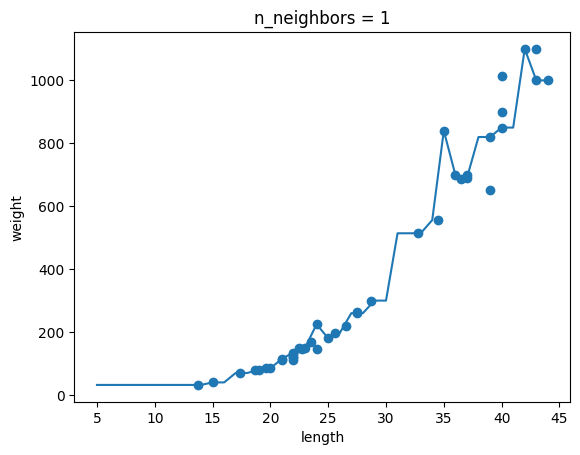

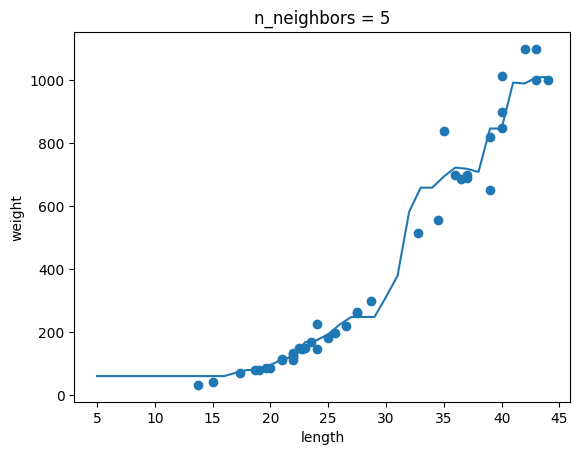

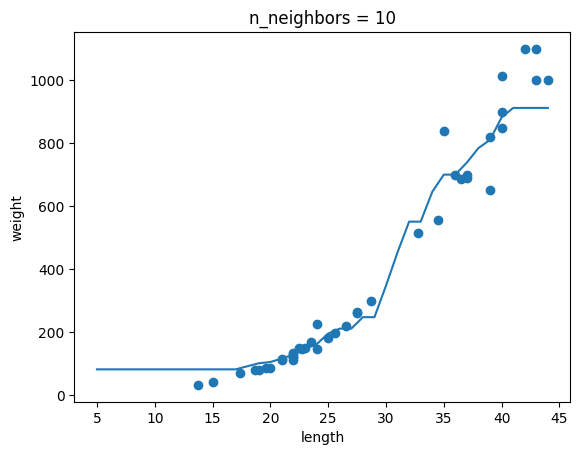

In [132]:
# 예제 실습

# k-최근접 이웃 회귀 객체를 만든다.
knr = KNeighborsRegressor()

# 농어의 길이를 5에서 45까지의 x 좌표를 만든다.
x = np.arange(5,45).reshape(-1,1)

# n = 1,5,10일 떄 예측 결과를 그래프로 그린다.

for n in [1,5,10]:

    # 모델을 훈련한다
    knr.n_neighbors = n
    knr.fit(train_input,train_target)

    # 지정한 범위 x에 대한 예측을 구한다.
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과를 그래프로 그린다.

    plt.scatter(train_input,train_target)
    plt.plot(x,prediction)
    plt.title("n_neighbors = {}".format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()


## 3-2 선형 회귀

### k - 최근접 이웃의 한계


In [133]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [134]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눈다.

train_input, test_input, train_target, test_target = train_test_split(
    perch_length,perch_weight,random_state =42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변환한다.

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input,train_target)


KNeighborsRegressor(n_neighbors=3)

In [135]:
print(knr.predict([[50]]))

# 50cm 농어의 무게를 1033g으로 예측함, 그러나 실제 이 농어의 무게는 훨씬 많이 나감 (1.5kg)

[1033.33333333]


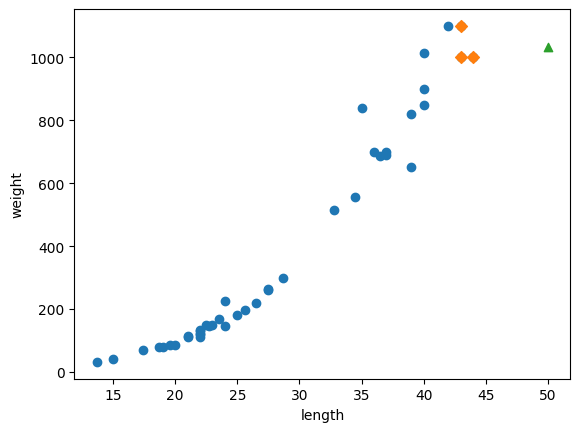

In [136]:
# 농어의 최근접 이웃을 산점도에 표기하기

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input,train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes],train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [137]:
print(np.mean(train_target[indexes]))

# 가장 까까운 샘플을 찾아 타깃을 평균한다. 따라서, 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값으로 예측할 수 있다.

1033.3333333333333


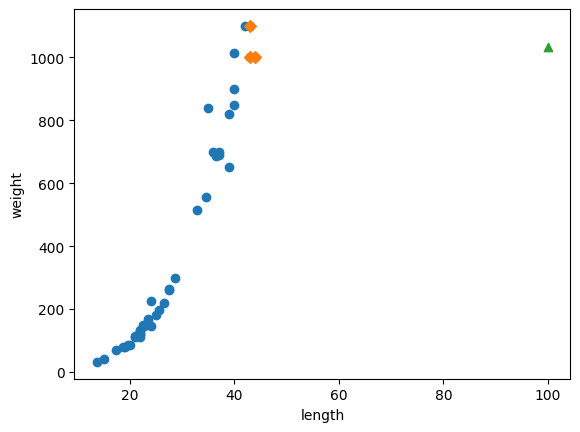

In [138]:
# 100cm 농어의 이웃을 구한다.

distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input,train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes],train_target[indexes], marker = 'D')

# 100cm 농어 데이터
plt.scatter(100,1033,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀

특성이 하나인 경우 어떤 직선을 학습하는 알고리즘


In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련한다.
lr.fit(train_input,train_target)

# 50cm 농어에 대해 예측한다.
print(lr.predict([[50]]))

[1241.83860323]


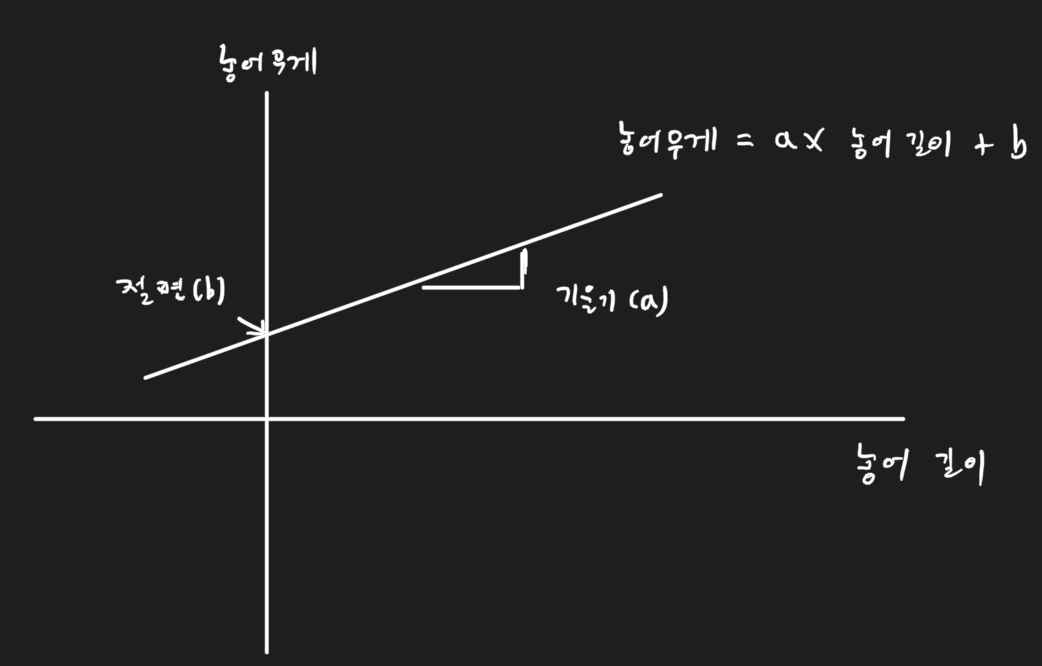




---

LinearRegression 클래스가 이 데이터에 가장 잘 맞는 a와 b를 찾았다.

LinearRegression 클래스가 찾은 a와 b는 각각 lr 객체의 coef_와 intercept_ 속성에 저장되어 있다.


In [140]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477



*   coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)** 라고 부른다.
*   머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같고, 이를 **모델 기반 학습**이라고 부른다.
*   k-최근접 이웃에는 모델 파라미터가 없고, 훈련 세트를 저장하는 것이 훈련의 전부이므로 이를 **사례 기반 학습** 이라고 한다.




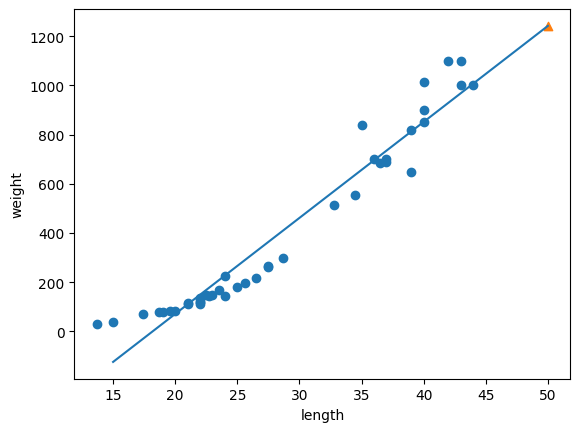

In [141]:
# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input,train_target)

# 15에서 50까지 1차 방정식 그래프를 그린다.
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,1241.8,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 이를 통해, 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있게 되었다.
# 그러나, 왼쪽 아래 부분은 데이터를 잘 대변한다고 보기는 어렵다.

In [142]:
print(lr.score(train_input,train_target)) # 훈련 세트
print(lr.score(test_input,test_target)) # 테스트 세트

# 훈련 세트와 테스트 세트의 점수가 조금 차이가 나고, 과대 적합되었다고도 볼 수 있다.
# 두 세트 모두 점수가 낮은 편이여서 과소적합 되어싿고도 볼 수 있다.

0.939846333997604
0.8247503123313558


### 다항 회귀
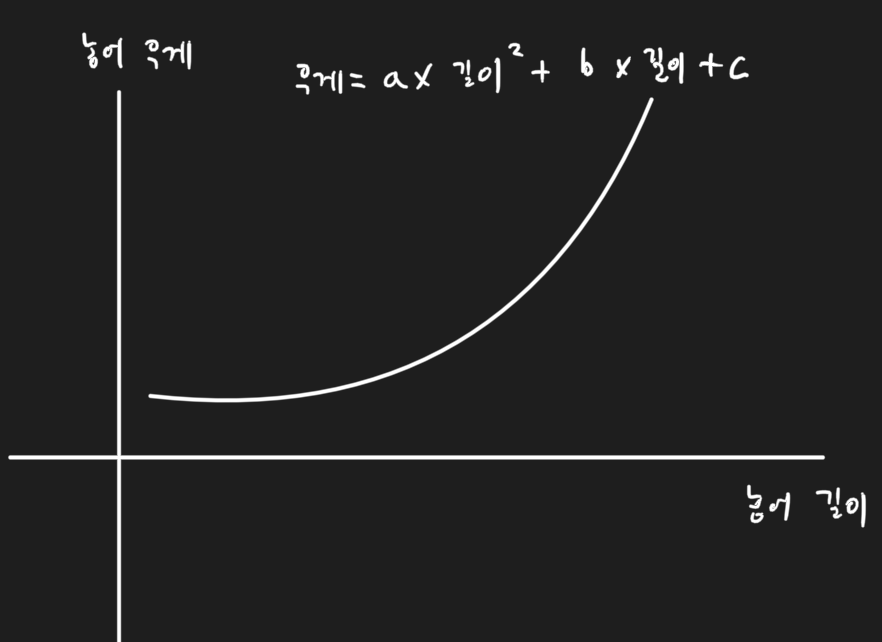


위와 같은 2차 방정식 그래프를 그리기 위해 제곱한 항이 훈련 세트에 추가되어야 한다.
넘파이를 활용하여 농어의 길이를 제곱해서 원래 데이터 앞에 붙혀본다.

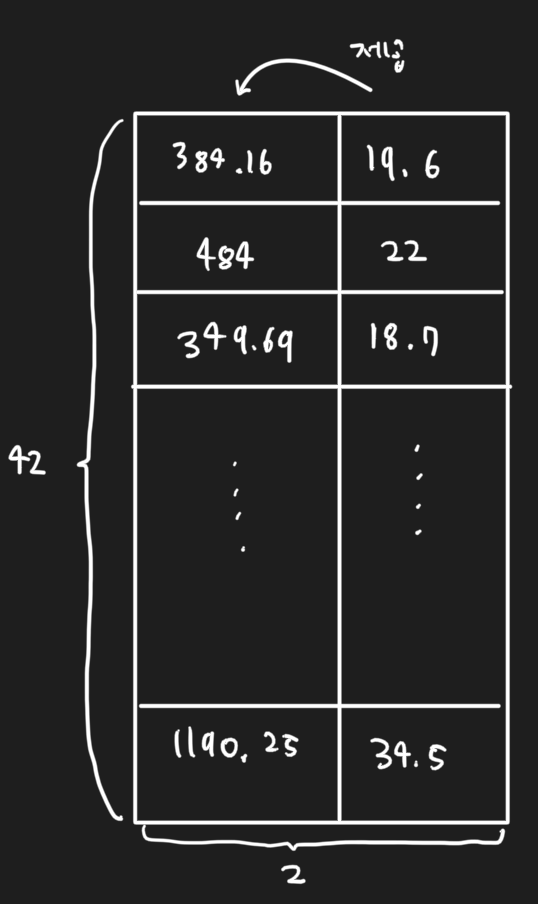

In [143]:
train_poly = np.column_stack((train_input **2,train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [144]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [145]:
"""
여기서 주목할 점은, 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱항을 추가했지만,
타깃값은 그대로 사용한다는 점이다. 목표하는 값은 어떤 그래프를 훈련하든 바꿀 필요가 없다.

"""

lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

# 전에 훈련했던 모델보다 더 높은 값을 예측했다.

[1573.98423528]


In [146]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


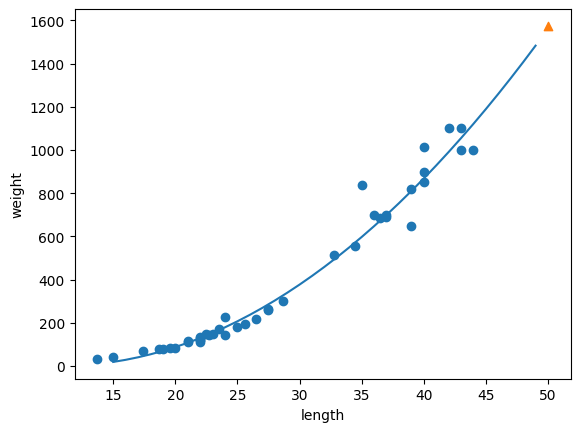

In [147]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.

point = np.arange(15,50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [148]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# R^2 점수가 크게 높아졌다, 그러나 테스트 세트 점수가 조금 더 높다.

0.9706807451768623
0.9775935108325122


## 3-3 특성 공학(Feature Engineering)과 규제(Regulation)


---

*   여러 특성을 사용한 **다중 회귀**에 대해 배우고 사이킷런의 여러 도구를 사용한다.
*   **릿지와 라쏘 회귀**를 통해 복잡한 과대적합을 막는 것을 배운다.





### 다중 회귀

여리 개의 특성을 사용한 선형 회귀를 **다중 회귀(Multiple Regression)**라고 부른다.

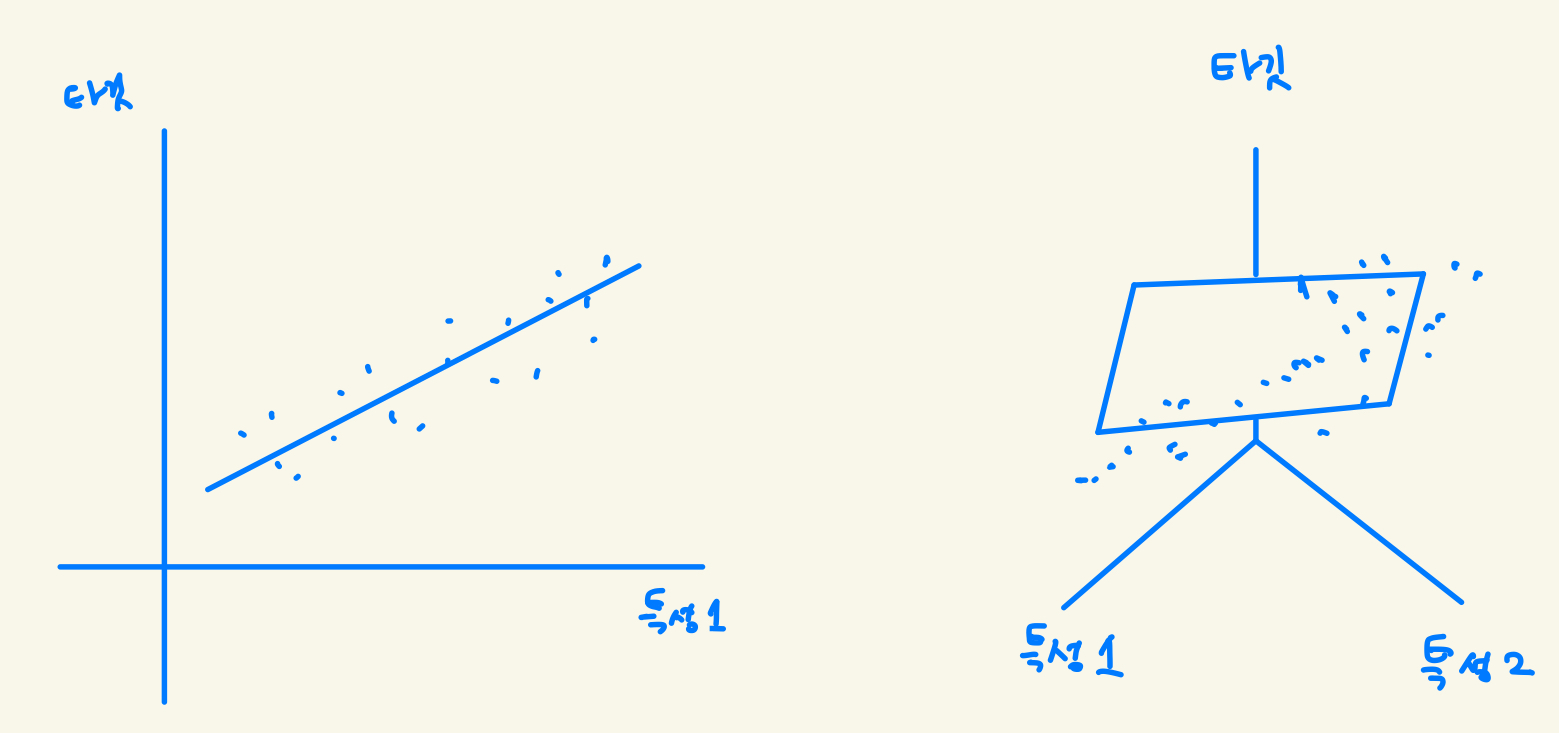


농어의 길이 뿐만 아니라, 농어의 높이와 두께도 함꼐 사용하기로 한다. 또한, '농어 길이 x 농어 높이'를 새로운 특성으로 만든다.

이처럼, 기존의 특성을 사용해, 새로운 특성을 뽑아내는 작업을 **특성 공학(feature engineering)**이라고 부른다.

### 데이터 준비

In [149]:
# 판다스 활용

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

# length, height, width

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [150]:
# 타깃 데이터
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [151]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눈다.

from sklearn.model_selection import train_test_split
train_input, test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state = 42)

### 사이킷런의 변환기

사이킷런에는 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공하는데, 이를 변환기(transformer)라고 부른다.


In [152]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

# fit() : 새롭게 만들 특성 조합을 찾는다. 입력 데이터를 변환하는데 타깃 데이터가 필요하지 않다.
poly.fit([[2,3]])

# transform() : 실제로 데이터를 변환한다.
print(poly.transform([[2,3]]))


# PolynomialFeatures 클래스는 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가한다.

[[1. 2. 3. 4. 6. 9.]]


무게 = a * 길이 + b * 높이 + c * 두께 + d * 1

선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다. 이렇게 놓고 보면 특성은 (길이,높이,두께,1)이 된다. 하지만, 사이킷런의 선형 모델은 자동으로 절편을 추가해주므로, 굳이 이런 특성을 만들어줄 필요는 없다.


In [153]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# 사이킷런에서는 참고로 False라고 명시 안해도 알아서 절편 항을 무시한다.

[[2. 3. 4. 6. 9.]]


In [154]:
# train_input을 변환한 데이터를 train_poly에 저정하고 이 배열의 크기를 확인한다.

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)


(42, 9)


In [155]:
# 9개의 특성 확인하기
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [156]:
test_poly = poly.transform(test_input) # 테스트 세트 변환

# 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이는 것이 좋음

### 다중 회귀 모델 훈련하기

In [157]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9903183436982125


In [158]:
print(lr.score(test_poly,test_target))

0.9714559911594111


In [159]:
# 특성을 더 추가해보기

poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

# 만들어진 특성의 개수가 55개

(42, 55)


In [160]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [161]:
print(lr.score(test_poly,test_target))

# 음수는 훈련 세트에 너무 과대적합 되므로 테스트 세트에서는 형편없는 점수가 만들어진다

-144.40579436844948


### 규제(Regulation)


---
머신러닝 모델이 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다.

선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

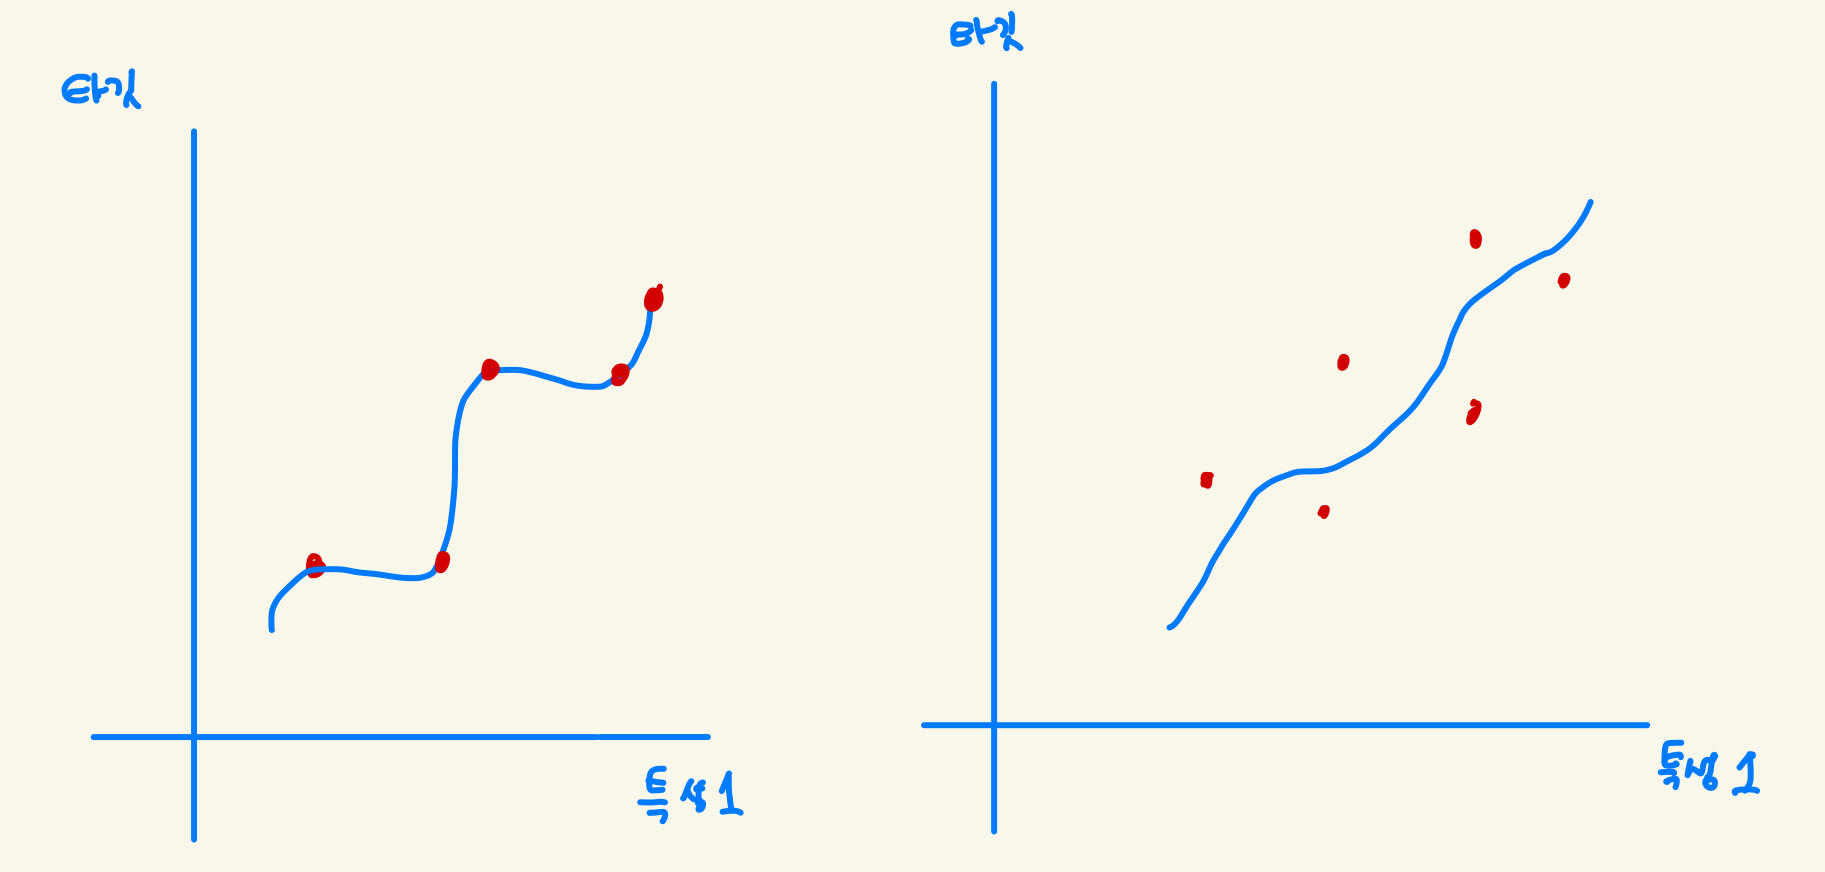


특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이가 난다. 그러므로, 먼저 정규화를 해야 할 필요가 있다.

표준점수로 구하는 방법도 있고, 사이킷런에서 제공하는 StandardScaler 클래스를 사용한다.

In [162]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

# 표준 점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 한다.
# 특성마다 계산하므로 55개의 평균과 표준 편차가 들어있다.

### 릿지 회귀

In [163]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

0.9896101671037343


In [164]:
print(ridge.score(test_scaled,test_target))

0.9790693977615387


**alpha 매개변수**를 통해 규제의 강도를 조절한다.


*   **alpha 값이 클 수록** 규제의 강도가 세지므로, 계수 값을 줄이고 과소적합을 유도한다.
*   **alpha 값이 작을 수록**, 규제 강도가 약해지고, 선형 회귀 모델과 유사해지므로, 과대적합될 가능성이 높다.

*   **하이퍼파라미터(hyperparameter)**: alpha 값이 릿지 모델이 학습하는 값이 아니라 사전에 사용자가 지정해야 하는 값인 것 처럼, 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 뜻한다.

*   함수, 클래스의 파라미터는 매개변수, 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미터)는 그대로 파라미터로 표현한다.



In [166]:
# alpha값에 대한 R^2값의 그래프를 그림으로써 적절한 값을 찾기

import matplotlib.pyplot as plt
train_score = []
test_score = []

In [167]:
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    # 릿지 모델을 만든다.
    ridge = Ridge(alpha = alpha)

    # 릿지 모델을 훈련한다.
    ridge.fit(train_scaled,train_target)

    # 훈련 점수와 테스트 점수를 저장한다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

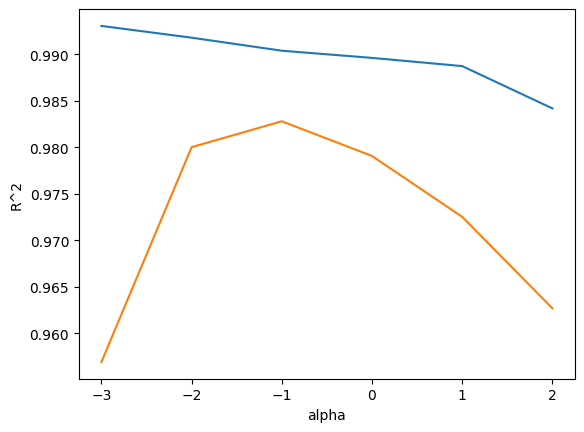

In [169]:
"""
0.001에서 10배씩 늘렸기 떄문에, 그대로 그리면 왼쪽으로 치우쳐져서 촘촘하게 그려진다.
따라서, alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현하려 한다.

0.001 = -3, 0.01 = -2 로 표현하고자 한다.

"""

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 왼쪽은 훈련과 테스트 세트 점수의 폭이 아주 큰 점을 볼 때 과대적합되어 있다.
# 오른쪽은 둘 다 점수가 낮아지는 과소적합의 모습을 띈다.

# 따라서, 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 10^-1 = 0.1이 가장 적절하다.

In [171]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀

In [172]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))

0.989789897208096


In [173]:
print(lasso.score(test_scaled,test_target))

0.9800593698421883


In [174]:
# 적절한 alpha값을 찾기 위한 그래프 그리기

train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    # 라쏘 모델을 형성한다.
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    # 라쏘 모델을 훈련한다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장한다.
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))


# 지정된 반복횟수가 부족할 때 warning이 발생하기도 하는데, 필요하면 늘릴 수 있다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


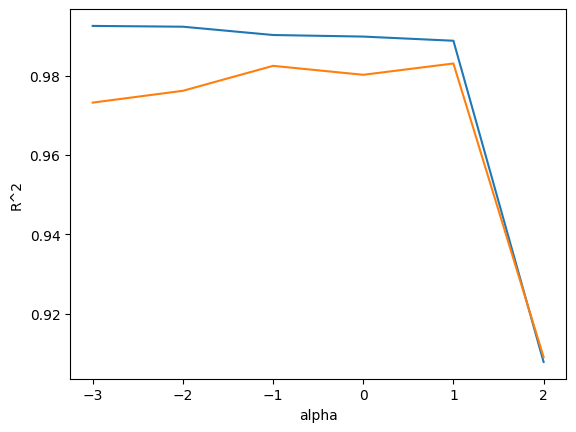

In [176]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


# 10^1 = 10, alpha 값을 10으로 맞추는게 가장 성능이 좋다.

In [177]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [178]:
# 라쏘 모델은 계수를 0으로도 만들 수 있다.
print(np.sum(lasso.coef_ == 0))

# 55개의 특성 중에서 15개의 특성만 사용한다는 점에서, 라쏘 모델은 유용한 특성을 골라주는 용도로 사용될 수 있다.

40
